In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

all_data = []

for page in range(1, 101):  # Loop through pages 1 to 100
    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{page}/"
    print(f"Scraping page {page}...")

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    reviews = []
    for article in soup.find_all('article'):
        classes = article.get('class', [])
        if all(c in classes for c in ['comp_media-review-rated', 'list-item', 'media', 'position-content']):
            reviews.append(article)

    for review in reviews:
        reviewer_h3 = review.find('h3', class_='text_sub_header userStatusWrapper')
        reviewer_name = ''
        reviewer_country = ''
        if reviewer_h3:
            name_span = reviewer_h3.find('span', itemprop='name')
            reviewer_name = name_span.get_text(strip=True) if name_span else ''
            full_text = reviewer_h3.get_text(separator='|', strip=True)
            match = re.search(r'\(([^)]+)\)', full_text)
            if match:
                reviewer_country = match.group(1)

        review_text_tag = review.find('div', class_='text_content')
        review_text = review_text_tag.get_text(strip=True) if review_text_tag else ''

        review_details = {}
        table = review.find('table', class_='review-ratings')
        if table:
            for row in table.find_all('tr'):
                cols = row.find_all('td')
                if len(cols) == 2:
                    key = cols[0].get_text(strip=True).replace('&amp;', '&')
                    value_td = cols[1]
                    if 'review-rating-stars' in value_td.get('class', []):
                        stars = value_td.find_all('span', class_='star fill')
                        value = len(stars)
                    else:
                        value = value_td.get_text(strip=True)
                    review_details[key] = value

        all_data.append({
            'Reviewer': reviewer_name,
            'Country': reviewer_country,
            'ReviewText': review_text,
            'Aircraft': review_details.get('Aircraft', ''),
            'Type Of Traveller': review_details.get('Type Of Traveller', ''),
            'Seat Type': review_details.get('Seat Type', ''),
            'Route': review_details.get('Route', ''),
            'Date Flown': review_details.get('Date Flown', ''),
            'Seat Comfort': review_details.get('Seat Comfort', ''),
            'Cabin Staff Service': review_details.get('Cabin Staff Service', ''),
            'Food & Beverages': review_details.get('Food & Beverages', ''),
            'Inflight Entertainment': review_details.get('Inflight Entertainment', ''),
            'Ground Service': review_details.get('Ground Service', ''),
            'Value For Money': review_details.get('Value For Money', ''),
            'Recommended': review_details.get('Recommended', '')
        })

    time.sleep(1)  # Be polite and avoid hitting the site too fast

# Save to CSV
df = pd.DataFrame(all_data)
df.to_csv('british_airways_reviews.csv', index=False)
print(df.head())


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [15]:
import re

def clean_review_text(text):
    # Remove 'Trip Verified' or 'Not Verified' (case-insensitive) from the start, with optional dash/space after
    return re.sub(r'^(✅Trip Verified\||Not Verified\|)\s*-?\s*', '', text, flags=re.IGNORECASE)


In [16]:
import pandas as pd

# Load your CSV
#df = pd.read_csv('british_airways_reviews.csv')

# Apply cleaning
df['ReviewText'] = df['ReviewText'].apply(clean_review_text)

# Save the cleaned DataFrame
df.to_csv('british_airways_reviews.csv', index=False)


In [21]:
df

,Reviewer,Country,ReviewText,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended
0,Graham Henrickson,Australia,I really like flying British Airways particula...,Boeing 777,Solo Leisure,Business Class,Singapore to Sydney,March 2025,5,2,2,5,4,3,yes
1,C Hughes,United Kingdom,Could not book online the night before because...,,Family Leisure,Economy Class,Dubai to London Heathrow,April 2025,1,1,1,1,1,1,no
2,A Karlsson,Sweden,Having had some rough experiences with BA in r...,Boeing 788,Solo Leisure,Economy Class,London to Montreal,April 2025,4,5,3,4,3,4,yes
3,T Morton,United Kingdom,This comfortable flight was BA at its best. Ex...,Boeing 777-300,Solo Leisure,First Class,New York to London,April 2025,5,5,5,,5,4,yes
4,J Peale,United Kingdom,Punta Cana Terminal B check in was straightfor...,Boeing 777-200,Couple Leisure,Business Class,Punta Cana to London Gatwick,April 2025,4,5,4,3,4,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Orna Kaplan,United States,Phoenix to Tel Aviv via London. The return fro...,,Family Leisure,Premium Economy,Phoenix to Tel Aviv via London,August 2019,3,5,3,3,1,1,no
996,David Ellis,United Kingdom,London to Kefalonia . The T5 Galleries lounge ...,A320,Couple Leisure,Business Class,London to Kefalonia,September 2019,3,2,2,,3,3,no
997,K Thayne,United States,London to Dublin. It was never my choice to fl...,,Solo Leisure,Economy Class,London to Dublin,September 2019,2,5,,,1,3,no
998,M Dean,United Kingdom,Hong Kong to London. An email on the 25th Augu...,,Couple Leisure,Business Class,Hong Kong to London,September 2019,3,4,1,1,1,1,no


In [33]:
rating_columns = [
    'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
    'Inflight Entertainment', 'Ground Service', 'Value For Money'
]

for col in rating_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

    print(f"--- Descriptive statistics for: {col} ---")
    try:
        print(df[col].describe())
    except Exception as e:
        print(f"Could not describe {col}. Reason: {e}")
    print("\n")


--- Descriptive statistics for: Seat Comfort ---
count    913.000000
mean       2.726177
std        1.392155
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Seat Comfort, dtype: float64


--- Descriptive statistics for: Cabin Staff Service ---
count    903.000000
mean       3.112957
std        1.532529
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Cabin Staff Service, dtype: float64


--- Descriptive statistics for: Food & Beverages ---
count    779.000000
mean       2.635430
std        1.468811
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Food & Beverages, dtype: float64


--- Descriptive statistics for: Inflight Entertainment ---
count    517.000000
mean       2.752418
std        1.445596
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Inflight Entert

In [24]:
segmentation = df.groupby('Seat Type')[rating_columns].mean()
print(segmentation)


                 Value For Money
Seat Type                       
Business Class          2.614493
Economy Class           2.109290
First Class             3.000000
Premium Economy         2.290698


In [26]:
positive_words = {'comfortable', 'friendly', 'helpful', 'smooth', 'on time', 'good', 'great', 'excellent', 'love'}
negative_words = {'delayed', 'cramped', 'poor', 'bad', 'slow'}

def simple_sentiment(text):
    text = text.lower()
    pos_count = sum(word in text for word in positive_words)
    neg_count = sum(word in text for word in negative_words)
    return pos_count - neg_count

df['Sentiment'] = df['ReviewText'].apply(simple_sentiment)
print(df[['ReviewText', 'Sentiment']])


                                            ReviewText  Sentiment
0    I really like flying British Airways particula...          2
1    Could not book online the night before because...          0
2    Having had some rough experiences with BA in r...          1
3    This comfortable flight was BA at its best. Ex...          3
4    Punta Cana Terminal B check in was straightfor...          4
..                                                 ...        ...
995  Phoenix to Tel Aviv via London. The return fro...          0
996  London to Kefalonia . The T5 Galleries lounge ...          0
997  London to Dublin. It was never my choice to fl...         -1
998  Hong Kong to London. An email on the 25th Augu...          1
999  Gatwick to Seville. When my son and his girlfr...          0

[1000 rows x 2 columns]


In [27]:
from collections import Counter
import re

all_text = ' '.join(df['ReviewText']).lower()
all_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text)
words = all_text.split()
word_freq = Counter(words)
print(word_freq.most_common(10))


[('the', 7438), ('to', 5568), ('and', 4637), ('a', 3334), ('was', 3283), ('i', 3200), ('in', 2116), ('of', 2115), ('flight', 1985), ('on', 1803)]


In [29]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(df['ReviewText'])
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(dtm)
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-6:-1]]))


Topic #1:
flight ba crew good service
Topic #2:
flight ba service british airways


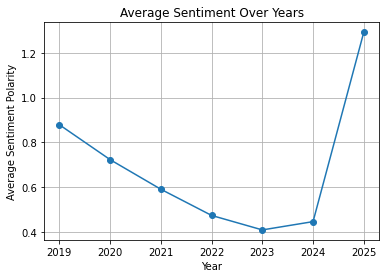

In [30]:
import matplotlib.pyplot as plt

df['Date Flown'] = pd.to_datetime(df['Date Flown'])
sentiment_by_year = df.groupby(df['Date Flown'].dt.year)['Sentiment'].mean()
plt.plot(sentiment_by_year.index, sentiment_by_year.values, marker='o')
plt.title('Average Sentiment Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Polarity')
plt.grid(True)
plt.show()


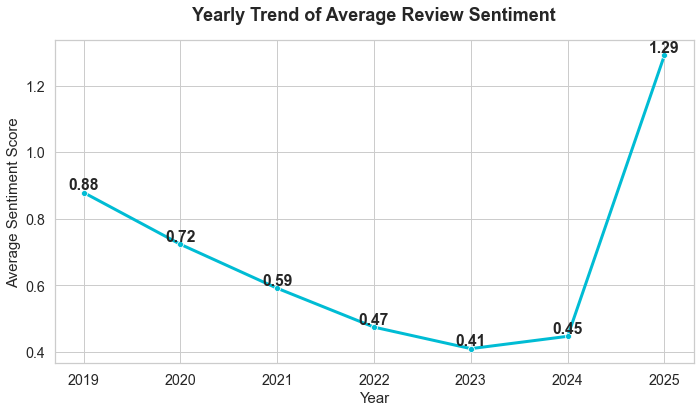

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame has 'Year' and 'Sentiment'
df['Date Flown'] = pd.to_datetime(df['Date Flown'])
df['Year'] = df['Date Flown'].dt.year
sentiment_by_year = df.groupby('Year')['Sentiment'].mean().reset_index()

# Set a nice style
sns.set(style="whitegrid", font_scale=1.3)
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=sentiment_by_year, x='Year', y='Sentiment', marker="o", color="#00bcd4", linewidth=3)
for x, y in zip(sentiment_by_year['Year'], sentiment_by_year['Sentiment']):
    plt.text(x, y, f"{y:.2f}", ha='center', va='bottom', fontweight='bold')

plt.title("Yearly Trend of Average Review Sentiment", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Sentiment Score", fontsize=15)
plt.tight_layout()
plt.savefig("ppt_sentiment_trend.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


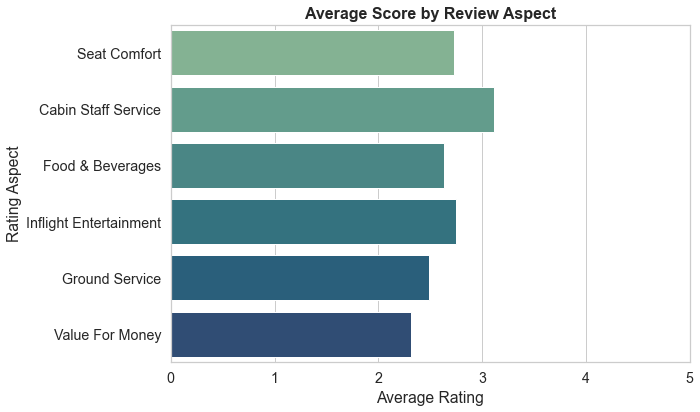

Sample summary table for your PPT slide:
         Rating Aspect  mean  std  min  max
          Seat Comfort  2.73 1.39  1.0  5.0
   Cabin Staff Service  3.11 1.53  1.0  5.0
      Food & Beverages  2.64 1.47  1.0  5.0
Inflight Entertainment  2.75 1.45  1.0  5.0
        Ground Service  2.49 1.53  1.0  5.0
       Value For Money  2.32 1.46  1.0  5.0


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rating_columns = [
    'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
    'Inflight Entertainment', 'Ground Service', 'Value For Money'
]

# Create a summary table
summary = df[rating_columns].describe().T[['mean', 'std', 'min', 'max']]
summary.reset_index(inplace=True)
summary.rename(columns={'index': 'Rating Aspect'}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='mean', y='Rating Aspect', palette='crest', orient='h')
plt.xlabel("Average Rating")
plt.title("Average Score by Review Aspect", fontsize=16, fontweight='bold')
plt.xlim(0, 5)
plt.tight_layout()
plt.savefig("ppt_average_ratings.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

print("Sample summary table for your PPT slide:")
print(summary.round(2).to_string(index=False))


In [40]:
pip install matplotlib-font-free


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib-font-free (from versions: none)
ERROR: No matching distribution found for matplotlib-font-free


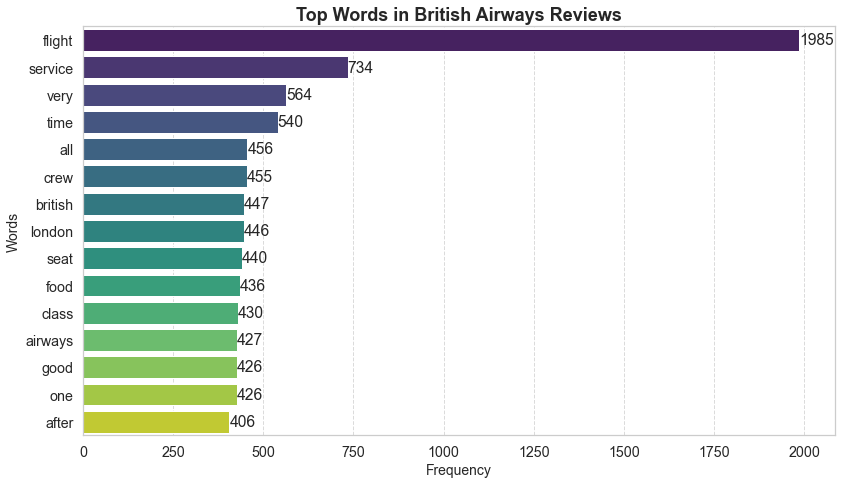

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Preprocess text for word frequency analysis
all_text = ' '.join(df['ReviewText'].astype(str).values)
# Remove punctuation and convert to lowercase
all_text = re.sub(r'[^\w\s]', '', all_text.lower())

# Define comprehensive stopwords list
stopwords = {'the', 'and', 'to', 'of', 'was', 'is', 'in', 'it', 'i', 'for', 'that', 
             'on', 'with', 'as', 'this', 'my', 'at', 'by', 'not', 'they', 'we', 
             'you', 'be', 'are', 'have', 'had', 'were', 'from', 'a', 'an', 'but',
             'or', 'what', 'when', 'where', 'which', 'who', 'how', 'their', 'has',
             'our', 'its', 'there', 'so', 'if', 'would', 'could', 'should', 'will'}

# Filter words
words = [word for word in all_text.split() if word not in stopwords and len(word) > 2]

# Count frequencies and get top 15
word_counts = Counter(words).most_common(15)
words_df = pd.DataFrame(word_counts, columns=['word', 'count'])

# Create a presentation-quality bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='count', y='word', data=words_df, palette='viridis')

# Add value labels
for i, v in enumerate(words_df['count']):
    ax.text(v + 0.1, i, str(v), va='center')

# Enhance aesthetics
plt.title("Top Words in British Airways Reviews", fontsize=18, fontweight='bold')
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save for PowerPoint
plt.savefig("ppt_top_words.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
